In [1]:
%load_ext autoreload
%autoreload 2

## Physics Informed Neural Networks for Inverse Problems

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pinn import Pinns
from pinns_phase import PinnLaterPhase

## Set up

In [3]:
kwargs = {
    "alpha_f" : 0.005,
    "h_f" : 5,
    "T_hot" : 4,
    "T0" : 1,
    "T_cold" : 1,
}

t0 = 0
tf = 1
n_int = 128
n_sb = 64
n_tb = 64

pinn = Pinns(n_int, n_sb, n_tb, t0, tf, **kwargs)

Charging


In [4]:
pinn.n_cycles

tensor(1)

In [5]:
# Plot the input training points

input_sb_, output_sb_ = pinn.add_spatial_boundary_points()
input_tb_, output_tb_ = pinn.add_temporal_boundary_points()
input_int_, output_int_ = pinn.add_interior_points()
input_meas_, output_meas_ = pinn.get_measurement_data()

Charging


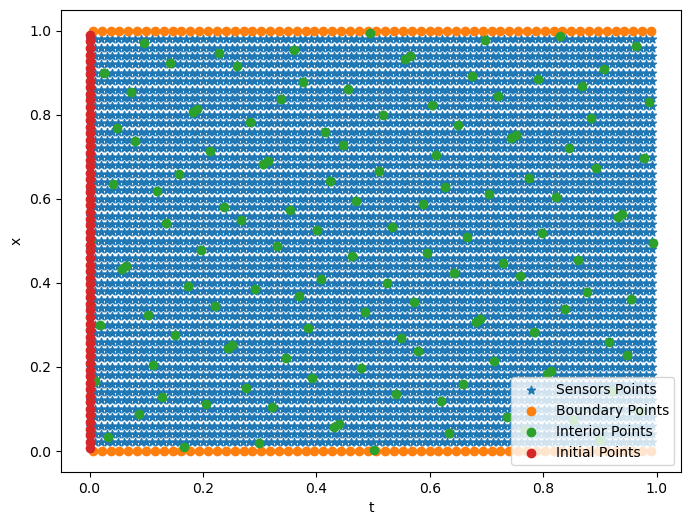

In [6]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(
    input_meas_[:, 0].detach().numpy(),
    input_meas_[:, 1].detach().numpy(), 
    label="Sensors Points", marker="*")
plt.scatter(
    input_sb_[:, 0].detach().numpy(),
    input_sb_[:, 1].detach().numpy(),
    label="Boundary Points")
plt.scatter(
    input_int_[:, 0].detach().numpy(),
    input_int_[:, 1].detach().numpy(),
    label="Interior Points")
plt.scatter(
    input_tb_[:, 0].detach().numpy(),
    input_tb_[:, 1].detach().numpy(),
    label="Initial Points")

plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

## Training

In [7]:
hist = pinn.fit(num_epochs=1, max_iter=1000, verbose=True)

################################  0  ################################
Total loss:  2.1901 | PDE Loss:  -1.1499 | Function Loss:  1.1899
Total loss:  2.1757 | PDE Loss:  -2.8193 | Function Loss:  1.1757
Total loss:  2.0614 | PDE Loss:  0.6413 | Function Loss:  1.0446
Total loss:  1.9596 | PDE Loss:  1.6883 | Function Loss:  0.6266
Total loss:  1.8802 | PDE Loss:  1.4691 | Function Loss:  0.6669
Total loss:  1.715 | PDE Loss:  -0.9915 | Function Loss:  0.7141
Total loss:  1.6694 | PDE Loss:  -0.7887 | Function Loss:  0.6679
Total loss:  1.5591 | PDE Loss:  0.2318 | Function Loss:  0.5381
Total loss:  1.5331 | PDE Loss:  -0.4108 | Function Loss:  0.5282
Total loss:  1.5297 | PDE Loss:  -0.3486 | Function Loss:  0.5239
Total loss:  1.509 | PDE Loss:  0.2558 | Function Loss:  0.4841
Total loss:  1.4908 | PDE Loss:  0.476 | Function Loss:  0.4467
Total loss:  1.4627 | PDE Loss:  0.5345 | Function Loss:  0.4082
Total loss:  1.4354 | PDE Loss:  0.6188 | Function Loss:  0.3635
Total loss:  1.40

## Visualization

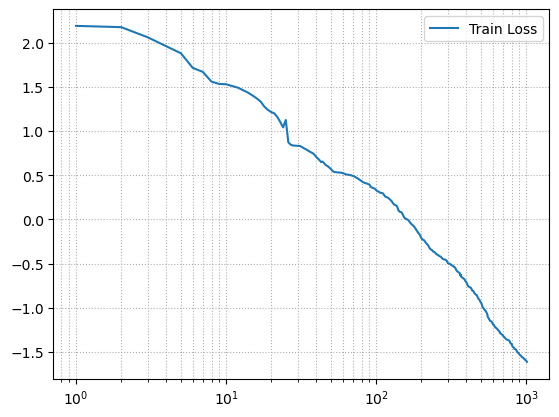

In [8]:
pinn.plot_loss_function(hist)

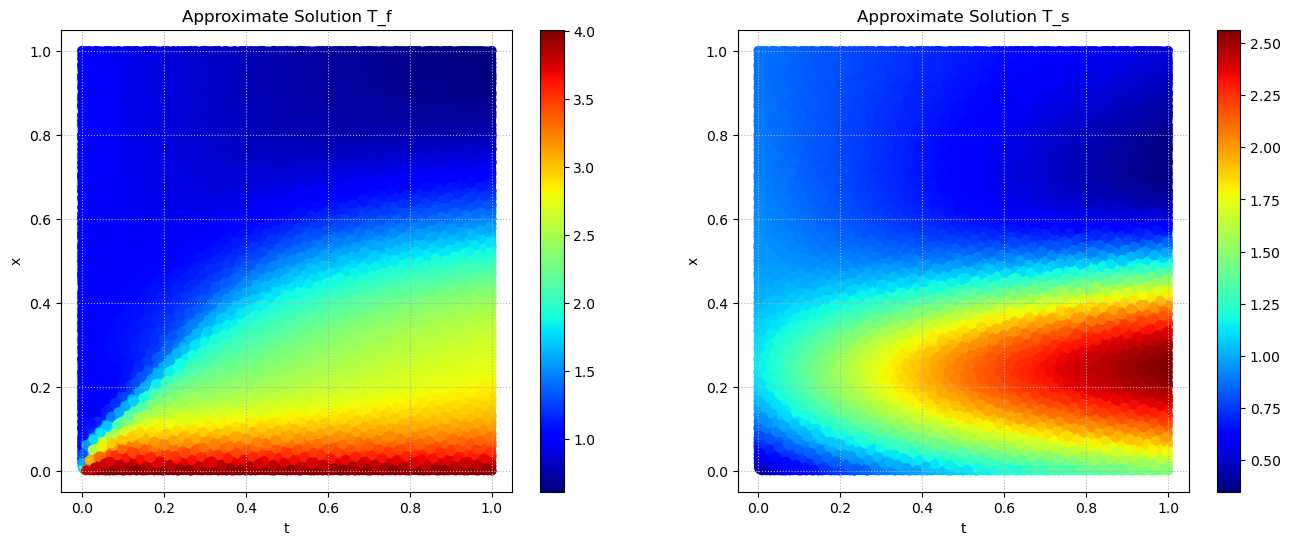

In [9]:
pinn.plot()

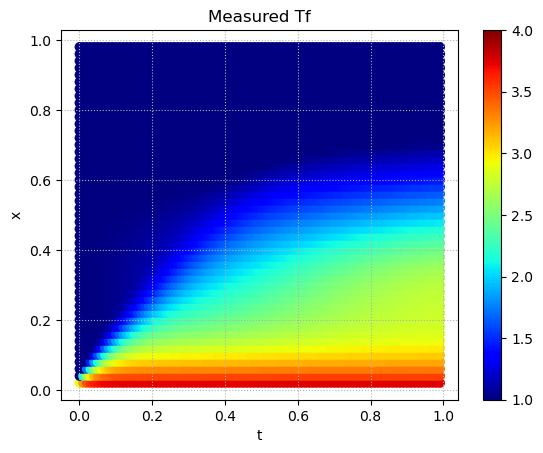

In [10]:
pinn.plot_reference()

# Second phase

In [11]:
t0 = 1
tf = 2

pinn_2 = PinnLaterPhase(n_int, n_sb, n_tb, t0, tf, pinn, **kwargs)

Idle


In [12]:
hist = pinn_2.fit(num_epochs=1, max_iter=1000, verbose=True)

################################  0  ################################
Total loss:  1.8822 | PDE Loss:  -0.0106 | Function Loss:  0.8766
Total loss:  1.8685 | PDE Loss:  0.1218 | Function Loss:  0.8607
Total loss:  1.7623 | PDE Loss:  0.8411 | Function Loss:  0.7068
Total loss:  1.6472 | PDE Loss:  1.3842 | Function Loss:  0.3044
Total loss:  1.5596 | PDE Loss:  1.2047 | Function Loss:  0.3064
Total loss:  1.4069 | PDE Loss:  0.5321 | Function Loss:  0.3447
Total loss:  1.2735 | PDE Loss:  -0.7967 | Function Loss:  0.2698
Total loss:  1.2499 | PDE Loss:  -0.3019 | Function Loss:  0.2376
Total loss:  1.2223 | PDE Loss:  -1.1106 | Function Loss:  0.2202
Total loss:  1.2169 | PDE Loss:  -1.621 | Function Loss:  0.2163
Total loss:  1.2152 | PDE Loss:  -1.9113 | Function Loss:  0.2149
Total loss:  1.214 | PDE Loss:  -1.9873 | Function Loss:  0.2138
Total loss:  1.2127 | PDE Loss:  -1.8611 | Function Loss:  0.2123
Total loss:  1.2105 | PDE Loss:  -1.5901 | Function Loss:  0.2099
Total loss:  

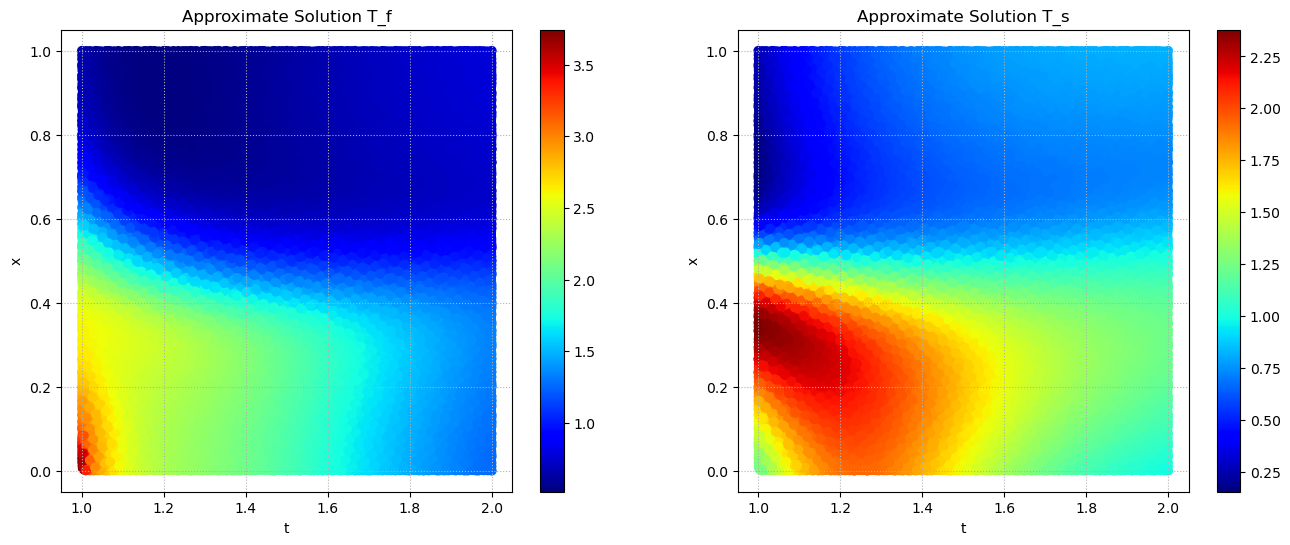

In [ ]:
pinn_2.plot()

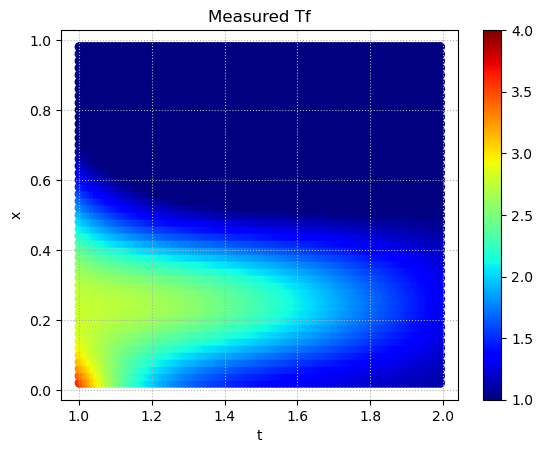

In [ ]:
pinn_2.plot_reference()

In [ ]:
t0 = 2
tf = 3

pinn_3 = PinnLaterPhase(n_int, n_sb, n_tb, t0, tf, pinn, **kwargs)

In [ ]:
hist = pinn_3.fit(num_epochs=1, max_iter=1000, verbose=True)

In [ ]:
pinn_3.plot()

In [ ]:
pinn_3.plot_reference()